In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Problem Statement – Enhance Image Resolution using Autoencoder

Most of us have struggled with clicking blurred images and struggling to enhance their resolution. Well, we’ll solve that problem using autoencoders here!
Let’s say we have a set of images of people’s faces in low resolution. Our task is to enhance the resolution of these images.

# Download Dataset

We will work on the popular “Labeled Faces in the Wild” dataset. It is a database of face photographs designed for studying the problem of unconstrained face recognition. However, here our objective is not face recognition but to build a model to improve image resolution.

In [2]:
# download dataset
! wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

--2020-05-02 07:52:13--  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180566744 (172M) [application/x-gzip]
Saving to: ‘lfw.tgz’

lfw.tgz             100%[===================>] 172.20M  74.0MB/s    in 2.3s    

2020-05-02 07:52:15 (74.0 MB/s) - ‘lfw.tgz’ saved [180566744/180566744]



In [3]:
#Extract dataset
! tar -xvzf lfw.tgz

lfw/
lfw/George_HW_Bush/
lfw/George_HW_Bush/George_HW_Bush_0001.jpg
lfw/George_HW_Bush/George_HW_Bush_0002.jpg
lfw/George_HW_Bush/George_HW_Bush_0003.jpg
lfw/George_HW_Bush/George_HW_Bush_0004.jpg
lfw/George_HW_Bush/George_HW_Bush_0005.jpg
lfw/George_HW_Bush/George_HW_Bush_0006.jpg
lfw/George_HW_Bush/George_HW_Bush_0007.jpg
lfw/George_HW_Bush/George_HW_Bush_0008.jpg
lfw/George_HW_Bush/George_HW_Bush_0009.jpg
lfw/George_HW_Bush/George_HW_Bush_0010.jpg
lfw/George_HW_Bush/George_HW_Bush_0011.jpg
lfw/George_HW_Bush/George_HW_Bush_0012.jpg
lfw/George_HW_Bush/George_HW_Bush_0013.jpg
lfw/Curtis_Strange/
lfw/Curtis_Strange/Curtis_Strange_0001.jpg
lfw/Marc_Grossman/
lfw/Marc_Grossman/Marc_Grossman_0001.jpg
lfw/Marc_Grossman/Marc_Grossman_0002.jpg
lfw/Marc_Grossman/Marc_Grossman_0003.jpg
lfw/Marc_Grossman/Marc_Grossman_0004.jpg
lfw/Michael_Schumacher/
lfw/Michael_Schumacher/Michael_Schumacher_0001.jpg
lfw/Michael_Schumacher/Michael_Schumacher_0002.jpg
lfw/Michael_Schumacher/Michael_Schumacher_00

lfw/Gerhard_Schroeder/Gerhard_Schroeder_0014.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0015.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0016.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0017.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0018.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0019.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0020.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0021.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0022.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0023.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0024.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0025.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0026.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0027.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0028.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0029.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0030.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0031.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0032.jpg
lfw/Gerhard_Schroeder/Gerhard_Schroeder_0033.jpg
lfw/Gerhard_Schroede

lfw/George_W_Bush/George_W_Bush_0105.jpg
lfw/George_W_Bush/George_W_Bush_0106.jpg
lfw/George_W_Bush/George_W_Bush_0107.jpg
lfw/George_W_Bush/George_W_Bush_0108.jpg
lfw/George_W_Bush/George_W_Bush_0109.jpg
lfw/George_W_Bush/George_W_Bush_0110.jpg
lfw/George_W_Bush/George_W_Bush_0111.jpg
lfw/George_W_Bush/George_W_Bush_0112.jpg
lfw/George_W_Bush/George_W_Bush_0113.jpg
lfw/George_W_Bush/George_W_Bush_0114.jpg
lfw/George_W_Bush/George_W_Bush_0115.jpg
lfw/George_W_Bush/George_W_Bush_0116.jpg
lfw/George_W_Bush/George_W_Bush_0117.jpg
lfw/George_W_Bush/George_W_Bush_0118.jpg
lfw/George_W_Bush/George_W_Bush_0119.jpg
lfw/George_W_Bush/George_W_Bush_0120.jpg
lfw/George_W_Bush/George_W_Bush_0121.jpg
lfw/George_W_Bush/George_W_Bush_0122.jpg
lfw/George_W_Bush/George_W_Bush_0123.jpg
lfw/George_W_Bush/George_W_Bush_0124.jpg
lfw/George_W_Bush/George_W_Bush_0125.jpg
lfw/George_W_Bush/George_W_Bush_0126.jpg
lfw/George_W_Bush/George_W_Bush_0127.jpg
lfw/George_W_Bush/George_W_Bush_0128.jpg
lfw/George_W_Bus

lfw/George_W_Bush/George_W_Bush_0434.jpg
lfw/George_W_Bush/George_W_Bush_0435.jpg
lfw/George_W_Bush/George_W_Bush_0436.jpg
lfw/George_W_Bush/George_W_Bush_0437.jpg
lfw/George_W_Bush/George_W_Bush_0438.jpg
lfw/George_W_Bush/George_W_Bush_0439.jpg
lfw/George_W_Bush/George_W_Bush_0440.jpg
lfw/George_W_Bush/George_W_Bush_0441.jpg
lfw/George_W_Bush/George_W_Bush_0442.jpg
lfw/George_W_Bush/George_W_Bush_0443.jpg
lfw/George_W_Bush/George_W_Bush_0444.jpg
lfw/George_W_Bush/George_W_Bush_0445.jpg
lfw/George_W_Bush/George_W_Bush_0446.jpg
lfw/George_W_Bush/George_W_Bush_0447.jpg
lfw/George_W_Bush/George_W_Bush_0448.jpg
lfw/George_W_Bush/George_W_Bush_0449.jpg
lfw/George_W_Bush/George_W_Bush_0450.jpg
lfw/George_W_Bush/George_W_Bush_0451.jpg
lfw/George_W_Bush/George_W_Bush_0452.jpg
lfw/George_W_Bush/George_W_Bush_0453.jpg
lfw/George_W_Bush/George_W_Bush_0454.jpg
lfw/George_W_Bush/George_W_Bush_0455.jpg
lfw/George_W_Bush/George_W_Bush_0456.jpg
lfw/George_W_Bush/George_W_Bush_0457.jpg
lfw/George_W_Bus

lfw/Bono/Bono_0002.jpg
lfw/Bono/Bono_0003.jpg
lfw/Oprah_Winfrey/
lfw/Oprah_Winfrey/Oprah_Winfrey_0001.jpg
lfw/Oprah_Winfrey/Oprah_Winfrey_0002.jpg
lfw/Oprah_Winfrey/Oprah_Winfrey_0003.jpg
lfw/Oprah_Winfrey/Oprah_Winfrey_0004.jpg
lfw/Sam_Mendes/
lfw/Sam_Mendes/Sam_Mendes_0001.jpg
lfw/Sam_Mendes/Sam_Mendes_0002.jpg
lfw/Ann_Veneman/
lfw/Ann_Veneman/Ann_Veneman_0001.jpg
lfw/Ann_Veneman/Ann_Veneman_0002.jpg
lfw/Ann_Veneman/Ann_Veneman_0003.jpg
lfw/Ann_Veneman/Ann_Veneman_0004.jpg
lfw/Ann_Veneman/Ann_Veneman_0005.jpg
lfw/Ann_Veneman/Ann_Veneman_0006.jpg
lfw/Ann_Veneman/Ann_Veneman_0007.jpg
lfw/Ann_Veneman/Ann_Veneman_0008.jpg
lfw/Ann_Veneman/Ann_Veneman_0009.jpg
lfw/Ann_Veneman/Ann_Veneman_0010.jpg
lfw/Ann_Veneman/Ann_Veneman_0011.jpg
lfw/Paulo_Cesar_Pinheiro/
lfw/Paulo_Cesar_Pinheiro/Paulo_Cesar_Pinheiro_0001.jpg
lfw/Paulo_Cesar_Pinheiro/Paulo_Cesar_Pinheiro_0002.jpg
lfw/Shannon_OBrien/
lfw/Shannon_OBrien/Shannon_OBrien_0001.jpg
lfw/Shannon_OBrien/Shannon_OBrien_0002.jpg
lfw/Vicente_Fernand

lfw/Kjell_Magne_Bondevik/Kjell_Magne_Bondevik_0003.jpg
lfw/Kofi_Annan/
lfw/Kofi_Annan/Kofi_Annan_0001.jpg
lfw/Kofi_Annan/Kofi_Annan_0002.jpg
lfw/Kofi_Annan/Kofi_Annan_0003.jpg
lfw/Kofi_Annan/Kofi_Annan_0004.jpg
lfw/Kofi_Annan/Kofi_Annan_0005.jpg
lfw/Kofi_Annan/Kofi_Annan_0006.jpg
lfw/Kofi_Annan/Kofi_Annan_0007.jpg
lfw/Kofi_Annan/Kofi_Annan_0008.jpg
lfw/Kofi_Annan/Kofi_Annan_0009.jpg
lfw/Kofi_Annan/Kofi_Annan_0010.jpg
lfw/Kofi_Annan/Kofi_Annan_0011.jpg
lfw/Kofi_Annan/Kofi_Annan_0012.jpg
lfw/Kofi_Annan/Kofi_Annan_0013.jpg
lfw/Kofi_Annan/Kofi_Annan_0014.jpg
lfw/Kofi_Annan/Kofi_Annan_0015.jpg
lfw/Kofi_Annan/Kofi_Annan_0016.jpg
lfw/Kofi_Annan/Kofi_Annan_0017.jpg
lfw/Kofi_Annan/Kofi_Annan_0018.jpg
lfw/Kofi_Annan/Kofi_Annan_0019.jpg
lfw/Kofi_Annan/Kofi_Annan_0020.jpg
lfw/Kofi_Annan/Kofi_Annan_0021.jpg
lfw/Kofi_Annan/Kofi_Annan_0022.jpg
lfw/Kofi_Annan/Kofi_Annan_0023.jpg
lfw/Kofi_Annan/Kofi_Annan_0024.jpg
lfw/Kofi_Annan/Kofi_Annan_0025.jpg
lfw/Kofi_Annan/Kofi_Annan_0026.jpg
lfw/Kofi_Annan/Kofi

lfw/Ray_Romano/Ray_Romano_0009.jpg
lfw/Robert_Torricelli/
lfw/Robert_Torricelli/Robert_Torricelli_0001.jpg
lfw/Robert_Torricelli/Robert_Torricelli_0002.jpg
lfw/Robert_Torricelli/Robert_Torricelli_0003.jpg
lfw/Amer_al-Saadi/
lfw/Amer_al-Saadi/Amer_al-Saadi_0001.jpg
lfw/Amer_al-Saadi/Amer_al-Saadi_0002.jpg
lfw/Amer_al-Saadi/Amer_al-Saadi_0003.jpg
lfw/Amer_al-Saadi/Amer_al-Saadi_0004.jpg
lfw/Carlo_Ancelotti/
lfw/Carlo_Ancelotti/Carlo_Ancelotti_0001.jpg
lfw/Carlo_Ancelotti/Carlo_Ancelotti_0002.jpg
lfw/Carlo_Ancelotti/Carlo_Ancelotti_0003.jpg
lfw/Barbra_Streisand/
lfw/Barbra_Streisand/Barbra_Streisand_0001.jpg
lfw/Barbra_Streisand/Barbra_Streisand_0002.jpg
lfw/Barbra_Streisand/Barbra_Streisand_0003.jpg
lfw/Ira_Einhorn/
lfw/Ira_Einhorn/Ira_Einhorn_0001.jpg
lfw/Fred_Huff/
lfw/Fred_Huff/Fred_Huff_0001.jpg
lfw/Abbas_Kiarostami/
lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg
lfw/Earl_Counter/
lfw/Earl_Counter/Earl_Counter_0001.jpg
lfw/Mark_Heller/
lfw/Mark_Heller/Mark_Heller_0001.jpg
lfw/Mark_He

lfw/Colin_Powell/Colin_Powell_0112.jpg
lfw/Colin_Powell/Colin_Powell_0113.jpg
lfw/Colin_Powell/Colin_Powell_0114.jpg
lfw/Colin_Powell/Colin_Powell_0115.jpg
lfw/Colin_Powell/Colin_Powell_0116.jpg
lfw/Colin_Powell/Colin_Powell_0117.jpg
lfw/Colin_Powell/Colin_Powell_0118.jpg
lfw/Colin_Powell/Colin_Powell_0119.jpg
lfw/Colin_Powell/Colin_Powell_0120.jpg
lfw/Colin_Powell/Colin_Powell_0121.jpg
lfw/Colin_Powell/Colin_Powell_0122.jpg
lfw/Colin_Powell/Colin_Powell_0123.jpg
lfw/Colin_Powell/Colin_Powell_0124.jpg
lfw/Colin_Powell/Colin_Powell_0125.jpg
lfw/Colin_Powell/Colin_Powell_0126.jpg
lfw/Colin_Powell/Colin_Powell_0127.jpg
lfw/Colin_Powell/Colin_Powell_0128.jpg
lfw/Colin_Powell/Colin_Powell_0129.jpg
lfw/Colin_Powell/Colin_Powell_0130.jpg
lfw/Colin_Powell/Colin_Powell_0131.jpg
lfw/Colin_Powell/Colin_Powell_0132.jpg
lfw/Colin_Powell/Colin_Powell_0133.jpg
lfw/Colin_Powell/Colin_Powell_0134.jpg
lfw/Colin_Powell/Colin_Powell_0135.jpg
lfw/Colin_Powell/Colin_Powell_0136.jpg
lfw/Colin_Powell/Colin_Po

lfw/John_Warner/John_Warner_0002.jpg
lfw/John_Warner/John_Warner_0003.jpg
lfw/John_Warner/John_Warner_0004.jpg
lfw/Michael_Smith_Foster/
lfw/Michael_Smith_Foster/Michael_Smith_Foster_0001.jpg
lfw/Ellen_Martin/
lfw/Ellen_Martin/Ellen_Martin_0001.jpg
lfw/Hillary_Clinton/
lfw/Hillary_Clinton/Hillary_Clinton_0001.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0002.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0003.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0004.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0005.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0006.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0007.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0008.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0009.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0010.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0011.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0012.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0013.jpg
lfw/Hillary_Clinton/Hillary_Clinton_0014.jpg
lfw/Sandra_Ceccarelli/
lfw/Sandra_Ceccarelli/Sandra_Ceccarelli_0001.jpg
lfw/Jayson_Williams/
lfw/Jay

lfw/George_Robertson/George_Robertson_0009.jpg
lfw/George_Robertson/George_Robertson_0010.jpg
lfw/George_Robertson/George_Robertson_0011.jpg
lfw/George_Robertson/George_Robertson_0012.jpg
lfw/George_Robertson/George_Robertson_0013.jpg
lfw/George_Robertson/George_Robertson_0014.jpg
lfw/George_Robertson/George_Robertson_0015.jpg
lfw/George_Robertson/George_Robertson_0016.jpg
lfw/George_Robertson/George_Robertson_0017.jpg
lfw/George_Robertson/George_Robertson_0018.jpg
lfw/George_Robertson/George_Robertson_0019.jpg
lfw/George_Robertson/George_Robertson_0020.jpg
lfw/George_Robertson/George_Robertson_0021.jpg
lfw/George_Robertson/George_Robertson_0022.jpg
lfw/Kate_Hudson/
lfw/Kate_Hudson/Kate_Hudson_0001.jpg
lfw/Kate_Hudson/Kate_Hudson_0002.jpg
lfw/Kate_Hudson/Kate_Hudson_0003.jpg
lfw/Kate_Hudson/Kate_Hudson_0004.jpg
lfw/Kate_Hudson/Kate_Hudson_0005.jpg
lfw/Kate_Hudson/Kate_Hudson_0006.jpg
lfw/Kate_Hudson/Kate_Hudson_0007.jpg
lfw/Kate_Hudson/Kate_Hudson_0008.jpg
lfw/Kate_Hudson/Kate_Hudson_0

lfw/Sebastian_Porto/
lfw/Sebastian_Porto/Sebastian_Porto_0001.jpg
lfw/Robert_Redford/
lfw/Robert_Redford/Robert_Redford_0001.jpg
lfw/Robert_Redford/Robert_Redford_0002.jpg
lfw/Robert_Redford/Robert_Redford_0003.jpg
lfw/Robert_Redford/Robert_Redford_0004.jpg
lfw/Robert_Redford/Robert_Redford_0005.jpg
lfw/Robert_Redford/Robert_Redford_0006.jpg
lfw/Robert_Redford/Robert_Redford_0007.jpg
lfw/Robert_Redford/Robert_Redford_0008.jpg
lfw/Miles_Stewart/
lfw/Miles_Stewart/Miles_Stewart_0001.jpg
lfw/Spencer_Abraham/
lfw/Spencer_Abraham/Spencer_Abraham_0001.jpg
lfw/Spencer_Abraham/Spencer_Abraham_0002.jpg
lfw/Spencer_Abraham/Spencer_Abraham_0003.jpg
lfw/Spencer_Abraham/Spencer_Abraham_0004.jpg
lfw/Spencer_Abraham/Spencer_Abraham_0005.jpg
lfw/Spencer_Abraham/Spencer_Abraham_0006.jpg
lfw/Spencer_Abraham/Spencer_Abraham_0007.jpg
lfw/Spencer_Abraham/Spencer_Abraham_0008.jpg
lfw/Spencer_Abraham/Spencer_Abraham_0009.jpg
lfw/Spencer_Abraham/Spencer_Abraham_0010.jpg
lfw/Spencer_Abraham/Spencer_Abraham_001

lfw/John_Bolton/John_Bolton_0011.jpg
lfw/John_Bolton/John_Bolton_0012.jpg
lfw/John_Bolton/John_Bolton_0013.jpg
lfw/John_Bolton/John_Bolton_0014.jpg
lfw/John_Bolton/John_Bolton_0015.jpg
lfw/John_Bolton/John_Bolton_0016.jpg
lfw/John_Bolton/John_Bolton_0017.jpg
lfw/Begum_Khaleda_Zia/
lfw/Begum_Khaleda_Zia/Begum_Khaleda_Zia_0001.jpg
lfw/Begum_Khaleda_Zia/Begum_Khaleda_Zia_0002.jpg
lfw/Liam_Neeson/
lfw/Liam_Neeson/Liam_Neeson_0001.jpg
lfw/Liam_Neeson/Liam_Neeson_0002.jpg
lfw/Liam_Neeson/Liam_Neeson_0003.jpg
lfw/Kathryn_Bigelow/
lfw/Kathryn_Bigelow/Kathryn_Bigelow_0001.jpg
lfw/Kathryn_Bigelow/Kathryn_Bigelow_0002.jpg
lfw/Alessandro_Nesta/
lfw/Alessandro_Nesta/Alessandro_Nesta_0001.jpg
lfw/Dino_Risi/
lfw/Dino_Risi/Dino_Risi_0001.jpg
lfw/Daniela_Hantuchova/
lfw/Daniela_Hantuchova/Daniela_Hantuchova_0001.jpg
lfw/Daniela_Hantuchova/Daniela_Hantuchova_0002.jpg
lfw/Allison_Searing/
lfw/Allison_Searing/Allison_Searing_0001.jpg
lfw/Matt_Herden/
lfw/Matt_Herden/Matt_Herden_0001.jpg
lfw/Ron_Kirk/
lfw/

lfw/Rudolph_Giuliani/Rudolph_Giuliani_0017.jpg
lfw/Rudolph_Giuliani/Rudolph_Giuliani_0018.jpg
lfw/Rudolph_Giuliani/Rudolph_Giuliani_0019.jpg
lfw/Rudolph_Giuliani/Rudolph_Giuliani_0020.jpg
lfw/Rudolph_Giuliani/Rudolph_Giuliani_0021.jpg
lfw/Rudolph_Giuliani/Rudolph_Giuliani_0022.jpg
lfw/Rudolph_Giuliani/Rudolph_Giuliani_0023.jpg
lfw/Rudolph_Giuliani/Rudolph_Giuliani_0024.jpg
lfw/Rudolph_Giuliani/Rudolph_Giuliani_0025.jpg
lfw/Rudolph_Giuliani/Rudolph_Giuliani_0026.jpg
lfw/Abdullah_Ahmad_Badawi/
lfw/Abdullah_Ahmad_Badawi/Abdullah_Ahmad_Badawi_0001.jpg
lfw/Mel_Gibson/
lfw/Mel_Gibson/Mel_Gibson_0001.jpg
lfw/Mel_Gibson/Mel_Gibson_0002.jpg
lfw/Ronaldo_Luis_Nazario_de_Lima/
lfw/Ronaldo_Luis_Nazario_de_Lima/Ronaldo_Luis_Nazario_de_Lima_0001.jpg
lfw/Ronaldo_Luis_Nazario_de_Lima/Ronaldo_Luis_Nazario_de_Lima_0002.jpg
lfw/Ronaldo_Luis_Nazario_de_Lima/Ronaldo_Luis_Nazario_de_Lima_0003.jpg
lfw/Ronaldo_Luis_Nazario_de_Lima/Ronaldo_Luis_Nazario_de_Lima_0004.jpg
lfw/Steve_Wariner/
lfw/Steve_Wariner/Steve

lfw/Kurt_Warner/
lfw/Kurt_Warner/Kurt_Warner_0001.jpg
lfw/Kurt_Warner/Kurt_Warner_0002.jpg
lfw/Kurt_Warner/Kurt_Warner_0003.jpg
lfw/Kurt_Warner/Kurt_Warner_0004.jpg
lfw/Kurt_Warner/Kurt_Warner_0005.jpg
lfw/Bustam_A_Zedan_Aljanabi/
lfw/Bustam_A_Zedan_Aljanabi/Bustam_A_Zedan_Aljanabi_0001.jpg
lfw/Art_Lopez/
lfw/Art_Lopez/Art_Lopez_0001.jpg
lfw/Carlos_Beltran/
lfw/Carlos_Beltran/Carlos_Beltran_0001.jpg
lfw/Raul_Ibanez/
lfw/Raul_Ibanez/Raul_Ibanez_0001.jpg
lfw/Vojislav_Seselj/
lfw/Vojislav_Seselj/Vojislav_Seselj_0001.jpg
lfw/Damon_Dash/
lfw/Damon_Dash/Damon_Dash_0001.jpg
lfw/Jade_Jagger/
lfw/Jade_Jagger/Jade_Jagger_0001.jpg
lfw/Dionigi_Tettamanzi/
lfw/Dionigi_Tettamanzi/Dionigi_Tettamanzi_0001.jpg
lfw/Aitor_Gonzalez/
lfw/Aitor_Gonzalez/Aitor_Gonzalez_0001.jpg
lfw/Aitor_Gonzalez/Aitor_Gonzalez_0002.jpg
lfw/Jerry_Rice/
lfw/Jerry_Rice/Jerry_Rice_0001.jpg
lfw/Miroljub/
lfw/Miroljub/Miroljub_0001.jpg
lfw/Miroljub/Miroljub_0002.jpg
lfw/Peter_Costello/
lfw/Peter_Costello/Peter_Costello_0001.jpg
l

lfw/Hugo_Chavez/Hugo_Chavez_0018.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0019.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0020.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0021.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0022.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0023.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0024.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0025.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0026.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0027.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0028.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0029.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0030.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0031.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0032.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0033.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0034.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0035.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0036.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0037.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0038.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0039.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0040.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0041.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0042.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0043.jpg
lfw/Hugo_Chavez/Hugo_Chavez_0044.jpg
l

lfw/Jennifer_Garner/Jennifer_Garner_0012.jpg
lfw/Thierry_Mariani/
lfw/Thierry_Mariani/Thierry_Mariani_0001.jpg
lfw/Debra_Brown/
lfw/Debra_Brown/Debra_Brown_0001.jpg
lfw/Debra_Brown/Debra_Brown_0002.jpg
lfw/Kimi_Raikkonen/
lfw/Kimi_Raikkonen/Kimi_Raikkonen_0001.jpg
lfw/Kimi_Raikkonen/Kimi_Raikkonen_0002.jpg
lfw/Kimi_Raikkonen/Kimi_Raikkonen_0003.jpg
lfw/Naomi_Campbell/
lfw/Naomi_Campbell/Naomi_Campbell_0001.jpg
lfw/Naomi_Campbell/Naomi_Campbell_0002.jpg
lfw/Michael_Douglas/
lfw/Michael_Douglas/Michael_Douglas_0001.jpg
lfw/Michael_Douglas/Michael_Douglas_0002.jpg
lfw/Michael_Douglas/Michael_Douglas_0003.jpg
lfw/Michael_Douglas/Michael_Douglas_0004.jpg
lfw/Michael_Douglas/Michael_Douglas_0005.jpg
lfw/Michael_Douglas/Michael_Douglas_0006.jpg
lfw/Brian_De_Palma/
lfw/Brian_De_Palma/Brian_De_Palma_0001.jpg
lfw/Nanni_Moretti/
lfw/Nanni_Moretti/Nanni_Moretti_0001.jpg
lfw/Nanni_Moretti/Nanni_Moretti_0002.jpg
lfw/Stefan_Holm/
lfw/Stefan_Holm/Stefan_Holm_0001.jpg
lfw/Mark_Mulder/
lfw/Mark_Mulder/M

lfw/Andres_Pastrana/
lfw/Andres_Pastrana/Andres_Pastrana_0001.jpg
lfw/Luis_Gonzalez_Macchi/
lfw/Luis_Gonzalez_Macchi/Luis_Gonzalez_Macchi_0001.jpg
lfw/Luis_Gonzalez_Macchi/Luis_Gonzalez_Macchi_0002.jpg
lfw/Luis_Gonzalez_Macchi/Luis_Gonzalez_Macchi_0003.jpg
lfw/Luis_Gonzalez_Macchi/Luis_Gonzalez_Macchi_0004.jpg
lfw/Luis_Gonzalez_Macchi/Luis_Gonzalez_Macchi_0005.jpg
lfw/Sila_Calderon/
lfw/Sila_Calderon/Sila_Calderon_0001.jpg
lfw/Sila_Calderon/Sila_Calderon_0002.jpg
lfw/Sila_Calderon/Sila_Calderon_0003.jpg
lfw/Sila_Calderon/Sila_Calderon_0004.jpg
lfw/Gary_Bettman/
lfw/Gary_Bettman/Gary_Bettman_0001.jpg
lfw/Darcy_Regier/
lfw/Darcy_Regier/Darcy_Regier_0001.jpg
lfw/Serge_Klarsfeld/
lfw/Serge_Klarsfeld/Serge_Klarsfeld_0001.jpg
lfw/Bob_Stoops/
lfw/Bob_Stoops/Bob_Stoops_0001.jpg
lfw/Bob_Stoops/Bob_Stoops_0002.jpg
lfw/Bob_Stoops/Bob_Stoops_0003.jpg
lfw/Bob_Stoops/Bob_Stoops_0004.jpg
lfw/Bob_Stoops/Bob_Stoops_0005.jpg
lfw/Bob_Stoops/Bob_Stoops_0006.jpg
lfw/Bob_Stoops/Bob_Stoops_0007.jpg
lfw/Erin_

lfw/Hector_Grullon/
lfw/Hector_Grullon/Hector_Grullon_0001.jpg
lfw/Hutomo_Mandala_Putra/
lfw/Hutomo_Mandala_Putra/Hutomo_Mandala_Putra_0001.jpg
lfw/Ryan_Leaf/
lfw/Ryan_Leaf/Ryan_Leaf_0001.jpg
lfw/Tsutomu_Takebe/
lfw/Tsutomu_Takebe/Tsutomu_Takebe_0001.jpg
lfw/Tsutomu_Takebe/Tsutomu_Takebe_0002.jpg
lfw/Bill_Belichick/
lfw/Bill_Belichick/Bill_Belichick_0001.jpg
lfw/Bill_Belichick/Bill_Belichick_0002.jpg
lfw/Zarai_Toledo/
lfw/Zarai_Toledo/Zarai_Toledo_0001.jpg
lfw/Zarai_Toledo/Zarai_Toledo_0002.jpg
lfw/Carlos_Ruckauf/
lfw/Carlos_Ruckauf/Carlos_Ruckauf_0001.jpg
lfw/Britney_Spears/
lfw/Britney_Spears/Britney_Spears_0001.jpg
lfw/Britney_Spears/Britney_Spears_0002.jpg
lfw/Britney_Spears/Britney_Spears_0003.jpg
lfw/Britney_Spears/Britney_Spears_0004.jpg
lfw/Britney_Spears/Britney_Spears_0005.jpg
lfw/Britney_Spears/Britney_Spears_0006.jpg
lfw/Britney_Spears/Britney_Spears_0007.jpg
lfw/Britney_Spears/Britney_Spears_0008.jpg
lfw/Britney_Spears/Britney_Spears_0009.jpg
lfw/Britney_Spears/Britney_Spe

lfw/Clifford_Robinson/
lfw/Clifford_Robinson/Clifford_Robinson_0001.jpg
lfw/Tayshaun_Prince/
lfw/Tayshaun_Prince/Tayshaun_Prince_0001.jpg
lfw/Mehmet_Okur/
lfw/Mehmet_Okur/Mehmet_Okur_0001.jpg
lfw/Corliss_Williamson/
lfw/Corliss_Williamson/Corliss_Williamson_0001.jpg
lfw/Ben_Wallace/
lfw/Ben_Wallace/Ben_Wallace_0001.jpg
lfw/Albrecht_Mentz/
lfw/Albrecht_Mentz/Albrecht_Mentz_0001.jpg
lfw/Albrecht_Mentz/Albrecht_Mentz_0002.jpg
lfw/Jimmy_Gurule/
lfw/Jimmy_Gurule/Jimmy_Gurule_0001.jpg
lfw/Estelle_Morris/
lfw/Estelle_Morris/Estelle_Morris_0001.jpg
lfw/Paul_Burrell/
lfw/Paul_Burrell/Paul_Burrell_0001.jpg
lfw/Paul_Burrell/Paul_Burrell_0002.jpg
lfw/Paul_Burrell/Paul_Burrell_0003.jpg
lfw/Paul_Burrell/Paul_Burrell_0004.jpg
lfw/Paul_Burrell/Paul_Burrell_0005.jpg
lfw/Paul_Burrell/Paul_Burrell_0006.jpg
lfw/Paul_Burrell/Paul_Burrell_0007.jpg
lfw/Paul_Burrell/Paul_Burrell_0008.jpg
lfw/Paul_Burrell/Paul_Burrell_0009.jpg
lfw/Paul_Burrell/Paul_Burrell_0010.jpg
lfw/Paul_Burrell/Paul_Burrell_0011.jpg
lfw/Pe

lfw/Steve_Phillips/
lfw/Steve_Phillips/Steve_Phillips_0001.jpg
lfw/Mekhi_Phifer/
lfw/Mekhi_Phifer/Mekhi_Phifer_0001.jpg
lfw/Lesley_Coppin/
lfw/Lesley_Coppin/Lesley_Coppin_0001.jpg
lfw/Lou_Piniella/
lfw/Lou_Piniella/Lou_Piniella_0001.jpg
lfw/Lou_Piniella/Lou_Piniella_0002.jpg
lfw/Lou_Piniella/Lou_Piniella_0003.jpg
lfw/Jeremy_Greenstock/
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0001.jpg
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0002.jpg
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0003.jpg
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0004.jpg
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0005.jpg
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0006.jpg
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0007.jpg
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0008.jpg
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0009.jpg
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0010.jpg
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0011.jpg
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0012.jpg
lfw/Jeremy_Greenstock/Jeremy_Greenstock_0013.jpg
lfw/Jeremy_Greenstock/Jer

lfw/Ashton_Kutcher/Ashton_Kutcher_0002.jpg
lfw/Ashton_Kutcher/Ashton_Kutcher_0003.jpg
lfw/Eliza_Manningham-Buller/
lfw/Eliza_Manningham-Buller/Eliza_Manningham-Buller_0001.jpg
lfw/Lily_Tomlin/
lfw/Lily_Tomlin/Lily_Tomlin_0001.jpg
lfw/Lily_Tomlin/Lily_Tomlin_0002.jpg
lfw/Steve_Karsay/
lfw/Steve_Karsay/Steve_Karsay_0001.jpg
lfw/Ronald_White/
lfw/Ronald_White/Ronald_White_0001.jpg
lfw/Darla_Moore/
lfw/Darla_Moore/Darla_Moore_0001.jpg
lfw/John_Edwards/
lfw/John_Edwards/John_Edwards_0001.jpg
lfw/John_Edwards/John_Edwards_0002.jpg
lfw/John_Edwards/John_Edwards_0003.jpg
lfw/John_Edwards/John_Edwards_0004.jpg
lfw/John_Edwards/John_Edwards_0005.jpg
lfw/John_Edwards/John_Edwards_0006.jpg
lfw/John_Edwards/John_Edwards_0007.jpg
lfw/John_Edwards/John_Edwards_0008.jpg
lfw/Martina_McBride/
lfw/Martina_McBride/Martina_McBride_0001.jpg
lfw/Martina_McBride/Martina_McBride_0002.jpg
lfw/Martina_McBride/Martina_McBride_0003.jpg
lfw/Martina_McBride/Martina_McBride_0004.jpg
lfw/Martina_McBride/Martina_McBrid

lfw/Ralph_Nader/
lfw/Ralph_Nader/Ralph_Nader_0001.jpg
lfw/Steven_Spielberg/
lfw/Steven_Spielberg/Steven_Spielberg_0001.jpg
lfw/Steven_Spielberg/Steven_Spielberg_0002.jpg
lfw/Steven_Spielberg/Steven_Spielberg_0003.jpg
lfw/Steven_Spielberg/Steven_Spielberg_0004.jpg
lfw/Steven_Spielberg/Steven_Spielberg_0005.jpg
lfw/Steven_Spielberg/Steven_Spielberg_0006.jpg
lfw/Steven_Spielberg/Steven_Spielberg_0007.jpg
lfw/Dave_Campo/
lfw/Dave_Campo/Dave_Campo_0001.jpg
lfw/Dave_Campo/Dave_Campo_0002.jpg
lfw/Dave_Campo/Dave_Campo_0003.jpg
lfw/Max_Biaggi/
lfw/Max_Biaggi/Max_Biaggi_0001.jpg
lfw/Stephen_Ambrose/
lfw/Stephen_Ambrose/Stephen_Ambrose_0001.jpg
lfw/Stephen_Ambrose/Stephen_Ambrose_0002.jpg
lfw/Susilo_Bambang_Yudhoyono/
lfw/Susilo_Bambang_Yudhoyono/Susilo_Bambang_Yudhoyono_0001.jpg
lfw/Susilo_Bambang_Yudhoyono/Susilo_Bambang_Yudhoyono_0002.jpg
lfw/Susilo_Bambang_Yudhoyono/Susilo_Bambang_Yudhoyono_0003.jpg
lfw/Susilo_Bambang_Yudhoyono/Susilo_Bambang_Yudhoyono_0004.jpg
lfw/Edward_Albee/
lfw/Edward_A

lfw/Conchita_Martinez/
lfw/Conchita_Martinez/Conchita_Martinez_0001.jpg
lfw/Conchita_Martinez/Conchita_Martinez_0002.jpg
lfw/Conchita_Martinez/Conchita_Martinez_0003.jpg
lfw/Taylor_Twellman/
lfw/Taylor_Twellman/Taylor_Twellman_0001.jpg
lfw/Patty_Schnyder/
lfw/Patty_Schnyder/Patty_Schnyder_0001.jpg
lfw/Patty_Schnyder/Patty_Schnyder_0002.jpg
lfw/Patty_Schnyder/Patty_Schnyder_0003.jpg
lfw/Patty_Schnyder/Patty_Schnyder_0004.jpg
lfw/Anna_Nicole_Smith/
lfw/Anna_Nicole_Smith/Anna_Nicole_Smith_0001.jpg
lfw/Anna_Nicole_Smith/Anna_Nicole_Smith_0002.jpg
lfw/Lane_Bryant/
lfw/Lane_Bryant/Lane_Bryant_0001.jpg
lfw/Beecher_Ray_Kirby/
lfw/Beecher_Ray_Kirby/Beecher_Ray_Kirby_0001.jpg
lfw/Martin_Short/
lfw/Martin_Short/Martin_Short_0001.jpg
lfw/Michael_Bouchard/
lfw/Michael_Bouchard/Michael_Bouchard_0001.jpg
lfw/Michael_Lopez-Alegria/
lfw/Michael_Lopez-Alegria/Michael_Lopez-Alegria_0001.jpg
lfw/Frederick_Madden/
lfw/Frederick_Madden/Frederick_Madden_0001.jpg
lfw/Peter_Harvey/
lfw/Peter_Harvey/Peter_Harve

lfw/Muhammad_Ali/Muhammad_Ali_0001.jpg
lfw/Muhammad_Ali/Muhammad_Ali_0002.jpg
lfw/Muhammad_Ali/Muhammad_Ali_0003.jpg
lfw/Muhammad_Ali/Muhammad_Ali_0004.jpg
lfw/Muhammad_Ali/Muhammad_Ali_0005.jpg
lfw/Muhammad_Ali/Muhammad_Ali_0006.jpg
lfw/Muhammad_Ali/Muhammad_Ali_0007.jpg
lfw/Muhammad_Ali/Muhammad_Ali_0008.jpg
lfw/Muhammad_Ali/Muhammad_Ali_0009.jpg
lfw/Muhammad_Ali/Muhammad_Ali_0010.jpg
lfw/Cassandra_Heise/
lfw/Cassandra_Heise/Cassandra_Heise_0001.jpg
lfw/Dora_Bakoyianni/
lfw/Dora_Bakoyianni/Dora_Bakoyianni_0001.jpg
lfw/Leszek_Miller/
lfw/Leszek_Miller/Leszek_Miller_0001.jpg
lfw/Leszek_Miller/Leszek_Miller_0002.jpg
lfw/Leszek_Miller/Leszek_Miller_0003.jpg
lfw/Boutros_Boutros_Ghali/
lfw/Boutros_Boutros_Ghali/Boutros_Boutros_Ghali_0001.jpg
lfw/Wilfredo_Moreno/
lfw/Wilfredo_Moreno/Wilfredo_Moreno_0001.jpg
lfw/John_Gruden/
lfw/John_Gruden/John_Gruden_0001.jpg
lfw/Garry_McCoy/
lfw/Garry_McCoy/Garry_McCoy_0001.jpg
lfw/Bashar_Assad/
lfw/Bashar_Assad/Bashar_Assad_0001.jpg
lfw/Bashar_Assad/Bash

lfw/Ashley_Judd/Ashley_Judd_0001.jpg
lfw/Celso_Amorim/
lfw/Celso_Amorim/Celso_Amorim_0001.jpg
lfw/Celso_Amorim/Celso_Amorim_0002.jpg
lfw/Adam_Rich/
lfw/Adam_Rich/Adam_Rich_0001.jpg
lfw/David_Duke/
lfw/David_Duke/David_Duke_0001.jpg
lfw/James_McPherson/
lfw/James_McPherson/James_McPherson_0001.jpg
lfw/Sam_Brownback/
lfw/Sam_Brownback/Sam_Brownback_0001.jpg
lfw/Yingfan_Wang/
lfw/Yingfan_Wang/Yingfan_Wang_0001.jpg
lfw/Martin_Scorsese/
lfw/Martin_Scorsese/Martin_Scorsese_0001.jpg
lfw/Martin_Scorsese/Martin_Scorsese_0002.jpg
lfw/Martin_Scorsese/Martin_Scorsese_0003.jpg
lfw/Martin_Scorsese/Martin_Scorsese_0004.jpg
lfw/Martin_Scorsese/Martin_Scorsese_0005.jpg
lfw/Martin_Scorsese/Martin_Scorsese_0006.jpg
lfw/Martin_Scorsese/Martin_Scorsese_0007.jpg
lfw/Mike_Price/
lfw/Mike_Price/Mike_Price_0001.jpg
lfw/Mike_Price/Mike_Price_0002.jpg
lfw/Pierre_Lacroix/
lfw/Pierre_Lacroix/Pierre_Lacroix_0001.jpg
lfw/Ghassan_Elashi/
lfw/Ghassan_Elashi/Ghassan_Elashi_0001.jpg
lfw/Ilan_Ramon/
lfw/Ilan_Ramon/Ilan_R

lfw/Mike_Krzyzewski/
lfw/Mike_Krzyzewski/Mike_Krzyzewski_0001.jpg
lfw/Mike_Krzyzewski/Mike_Krzyzewski_0002.jpg
lfw/Mike_Krzyzewski/Mike_Krzyzewski_0003.jpg
lfw/Mike_Krzyzewski/Mike_Krzyzewski_0004.jpg
lfw/Mike_Krzyzewski/Mike_Krzyzewski_0005.jpg
lfw/Mike_Krzyzewski/Mike_Krzyzewski_0006.jpg
lfw/Paul_Byrd/
lfw/Paul_Byrd/Paul_Byrd_0001.jpg
lfw/Paul_Byrd/Paul_Byrd_0002.jpg
lfw/Frank_Abagnale_Jr/
lfw/Frank_Abagnale_Jr/Frank_Abagnale_Jr_0001.jpg
lfw/Thomas_Fargo/
lfw/Thomas_Fargo/Thomas_Fargo_0001.jpg
lfw/Thomas_Fargo/Thomas_Fargo_0002.jpg
lfw/Thomas_Fargo/Thomas_Fargo_0003.jpg
lfw/Thomas_Fargo/Thomas_Fargo_0004.jpg
lfw/David_Anderson/
lfw/David_Anderson/David_Anderson_0001.jpg
lfw/David_Anderson/David_Anderson_0002.jpg
lfw/David_Anderson/David_Anderson_0003.jpg
lfw/David_Anderson/David_Anderson_0004.jpg
lfw/David_Anderson/David_Anderson_0005.jpg
lfw/Andrew_Luster/
lfw/Andrew_Luster/Andrew_Luster_0001.jpg
lfw/Thanongsak_Tuvinan/
lfw/Thanongsak_Tuvinan/Thanongsak_Tuvinan_0001.jpg
lfw/Aishwary

lfw/Didier_Defago/Didier_Defago_0001.jpg
lfw/Jack_Grubman/
lfw/Jack_Grubman/Jack_Grubman_0001.jpg
lfw/Jack_Grubman/Jack_Grubman_0002.jpg
lfw/Yang_Hee_Kim/
lfw/Yang_Hee_Kim/Yang_Hee_Kim_0001.jpg
lfw/Fruit_Chan/
lfw/Fruit_Chan/Fruit_Chan_0001.jpg
lfw/Raja_Ibrahim/
lfw/Raja_Ibrahim/Raja_Ibrahim_0001.jpg
lfw/Lionel_Hampton/
lfw/Lionel_Hampton/Lionel_Hampton_0001.jpg
lfw/Frank_Sinatra/
lfw/Frank_Sinatra/Frank_Sinatra_0001.jpg
lfw/Don_Meredith/
lfw/Don_Meredith/Don_Meredith_0001.jpg
lfw/Roger_Staubach/
lfw/Roger_Staubach/Roger_Staubach_0001.jpg
lfw/Roman_Coppola/
lfw/Roman_Coppola/Roman_Coppola_0001.jpg
lfw/Romain_Duris/
lfw/Romain_Duris/Romain_Duris_0001.jpg
lfw/Elodie_Bouchez/
lfw/Elodie_Bouchez/Elodie_Bouchez_0001.jpg
lfw/Ramon_Delgado/
lfw/Ramon_Delgado/Ramon_Delgado_0001.jpg
lfw/Wayne_Ferreira/
lfw/Wayne_Ferreira/Wayne_Ferreira_0001.jpg
lfw/Wayne_Ferreira/Wayne_Ferreira_0002.jpg
lfw/Wayne_Ferreira/Wayne_Ferreira_0003.jpg
lfw/Wayne_Ferreira/Wayne_Ferreira_0004.jpg
lfw/Wayne_Ferreira/Wayn

lfw/Matthew_Perry/Matthew_Perry_0007.jpg
lfw/Uma_Thurman/
lfw/Uma_Thurman/Uma_Thurman_0001.jpg
lfw/Uma_Thurman/Uma_Thurman_0002.jpg
lfw/Uma_Thurman/Uma_Thurman_0003.jpg
lfw/Toshi_Izawa/
lfw/Toshi_Izawa/Toshi_Izawa_0001.jpg
lfw/Dean_Jacek/
lfw/Dean_Jacek/Dean_Jacek_0001.jpg
lfw/Ian_Moran/
lfw/Ian_Moran/Ian_Moran_0001.jpg
lfw/Robin_McLaurin_Williams/
lfw/Robin_McLaurin_Williams/Robin_McLaurin_Williams_0001.jpg
lfw/Robin_McLaurin_Williams/Robin_McLaurin_Williams_0002.jpg
lfw/John_Gordnick/
lfw/John_Gordnick/John_Gordnick_0001.jpg
lfw/Inam-ul-Haq/
lfw/Inam-ul-Haq/Inam-ul-Haq_0001.jpg
lfw/Inam-ul-Haq/Inam-ul-Haq_0002.jpg
lfw/Nila_Ferran/
lfw/Nila_Ferran/Nila_Ferran_0001.jpg
lfw/Teddy_Kollek/
lfw/Teddy_Kollek/Teddy_Kollek_0001.jpg
lfw/Lemuel_Montulo/
lfw/Lemuel_Montulo/Lemuel_Montulo_0001.jpg
lfw/Al_Pacino/
lfw/Al_Pacino/Al_Pacino_0001.jpg
lfw/Al_Pacino/Al_Pacino_0002.jpg
lfw/Al_Pacino/Al_Pacino_0003.jpg
lfw/Mark_Bellhorn/
lfw/Mark_Bellhorn/Mark_Bellhorn_0001.jpg
lfw/Miranda_Gaddis/
lfw/Mira

lfw/Sarah_Hughes/Sarah_Hughes_0002.jpg
lfw/Sarah_Hughes/Sarah_Hughes_0003.jpg
lfw/Sarah_Hughes/Sarah_Hughes_0004.jpg
lfw/Sarah_Hughes/Sarah_Hughes_0005.jpg
lfw/Sarah_Hughes/Sarah_Hughes_0006.jpg
lfw/Brad_Russ/
lfw/Brad_Russ/Brad_Russ_0001.jpg
lfw/Kate_Burton/
lfw/Kate_Burton/Kate_Burton_0001.jpg
lfw/Mark_Hogan/
lfw/Mark_Hogan/Mark_Hogan_0001.jpg
lfw/Reginald_Hudlin/
lfw/Reginald_Hudlin/Reginald_Hudlin_0001.jpg
lfw/Almeida_Baptista/
lfw/Almeida_Baptista/Almeida_Baptista_0001.jpg
lfw/Tatiana_Panova/
lfw/Tatiana_Panova/Tatiana_Panova_0001.jpg
lfw/Rick_Bland/
lfw/Rick_Bland/Rick_Bland_0001.jpg
lfw/Jeffrey_Jones/
lfw/Jeffrey_Jones/Jeffrey_Jones_0001.jpg
lfw/Jeffrey_Jones/Jeffrey_Jones_0002.jpg
lfw/Brian_Cowen/
lfw/Brian_Cowen/Brian_Cowen_0001.jpg
lfw/Brian_Cowen/Brian_Cowen_0002.jpg
lfw/Paul_Murphy/
lfw/Paul_Murphy/Paul_Murphy_0001.jpg
lfw/Des_Brown/
lfw/Des_Brown/Des_Brown_0001.jpg
lfw/Beth_Blough/
lfw/Beth_Blough/Beth_Blough_0001.jpg
lfw/Amy_Smart/
lfw/Amy_Smart/Amy_Smart_0001.jpg
lfw/And

lfw/Abdullah_Gul/Abdullah_Gul_0006.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0007.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0008.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0009.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0010.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0011.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0012.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0013.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0014.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0015.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0016.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0017.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0018.jpg
lfw/Abdullah_Gul/Abdullah_Gul_0019.jpg
lfw/Steve_Lenard/
lfw/Steve_Lenard/Steve_Lenard_0001.jpg
lfw/Jean_Carnahan/
lfw/Jean_Carnahan/Jean_Carnahan_0001.jpg
lfw/Jean_Carnahan/Jean_Carnahan_0002.jpg
lfw/Dalai_Lama/
lfw/Dalai_Lama/Dalai_Lama_0001.jpg
lfw/Dalai_Lama/Dalai_Lama_0002.jpg
lfw/Jim_Leach/
lfw/Jim_Leach/Jim_Leach_0001.jpg
lfw/Jason_Jennings/
lfw/Jason_Jennings/Jason_Jennings_0001.jpg
lfw/Jason_Jennings/Jason_Jennings_0002.jpg
lfw/Keith_Bogans/
lfw/Keith_Bogans/Keith_Bogans_0001.jpg

lfw/Mikhail_Gorbachev/Mikhail_Gorbachev_0001.jpg
lfw/Mikhail_Gorbachev/Mikhail_Gorbachev_0002.jpg
lfw/Ashraf_Ghani/
lfw/Ashraf_Ghani/Ashraf_Ghani_0001.jpg
lfw/Hong_Myung/
lfw/Hong_Myung/Hong_Myung_0001.jpg
lfw/Aly_Wagner/
lfw/Aly_Wagner/Aly_Wagner_0001.jpg
lfw/Tian_Liang/
lfw/Tian_Liang/Tian_Liang_0001.jpg
lfw/Juan_Jose_Lucas/
lfw/Juan_Jose_Lucas/Juan_Jose_Lucas_0001.jpg
lfw/Milan_Kucan/
lfw/Milan_Kucan/Milan_Kucan_0001.jpg
lfw/Paula_Dobriansky/
lfw/Paula_Dobriansky/Paula_Dobriansky_0001.jpg
lfw/Arnold_Palmer/
lfw/Arnold_Palmer/Arnold_Palmer_0001.jpg
lfw/Arnold_Palmer/Arnold_Palmer_0002.jpg
lfw/Arnold_Palmer/Arnold_Palmer_0003.jpg
lfw/Brandon_Fails/
lfw/Brandon_Fails/Brandon_Fails_0001.jpg
lfw/Philip_Cummings/
lfw/Philip_Cummings/Philip_Cummings_0001.jpg
lfw/Marc_Gold/
lfw/Marc_Gold/Marc_Gold_0001.jpg
lfw/Bridgette_Wilson-Sampras/
lfw/Bridgette_Wilson-Sampras/Bridgette_Wilson-Sampras_0001.jpg
lfw/Bridgette_Wilson-Sampras/Bridgette_Wilson-Sampras_0002.jpg
lfw/Bridgette_Wilson-Sampras/Br

lfw/Roger_Penske/Roger_Penske_0001.jpg
lfw/Leland_Chapman/
lfw/Leland_Chapman/Leland_Chapman_0001.jpg
lfw/Leland_Chapman/Leland_Chapman_0002.jpg
lfw/Tim_Chapman/
lfw/Tim_Chapman/Tim_Chapman_0001.jpg
lfw/Tim_Chapman/Tim_Chapman_0002.jpg
lfw/Hermann_Maier/
lfw/Hermann_Maier/Hermann_Maier_0001.jpg
lfw/Hermann_Maier/Hermann_Maier_0002.jpg
lfw/Alfredo_di_Stefano/
lfw/Alfredo_di_Stefano/Alfredo_di_Stefano_0001.jpg
lfw/Dolly_Parton/
lfw/Dolly_Parton/Dolly_Parton_0001.jpg
lfw/Dolly_Parton/Dolly_Parton_0002.jpg
lfw/Kristanna_Loken/
lfw/Kristanna_Loken/Kristanna_Loken_0001.jpg
lfw/Kristanna_Loken/Kristanna_Loken_0002.jpg
lfw/Kristanna_Loken/Kristanna_Loken_0003.jpg
lfw/Kristanna_Loken/Kristanna_Loken_0004.jpg
lfw/Kristanna_Loken/Kristanna_Loken_0005.jpg
lfw/Valerie_Harper/
lfw/Valerie_Harper/Valerie_Harper_0001.jpg
lfw/Valerie_Harper/Valerie_Harper_0002.jpg
lfw/Sally_Kirkland/
lfw/Sally_Kirkland/Sally_Kirkland_0001.jpg
lfw/Sally_Kirkland/Sally_Kirkland_0002.jpg
lfw/Sally_Kirkland/Sally_Kirkland_

lfw/Anthony_Corso/Anthony_Corso_0001.jpg
lfw/Prakash_Hinduja/
lfw/Prakash_Hinduja/Prakash_Hinduja_0001.jpg
lfw/Roger_Federer/
lfw/Roger_Federer/Roger_Federer_0001.jpg
lfw/Roger_Federer/Roger_Federer_0002.jpg
lfw/Roger_Federer/Roger_Federer_0003.jpg
lfw/Roger_Federer/Roger_Federer_0004.jpg
lfw/Roger_Federer/Roger_Federer_0005.jpg
lfw/Roger_Federer/Roger_Federer_0006.jpg
lfw/Roger_Federer/Roger_Federer_0007.jpg
lfw/Roger_Federer/Roger_Federer_0008.jpg
lfw/Roger_Federer/Roger_Federer_0009.jpg
lfw/Roger_Federer/Roger_Federer_0010.jpg
lfw/Roger_Federer/Roger_Federer_0011.jpg
lfw/Roger_Federer/Roger_Federer_0012.jpg
lfw/Roger_Federer/Roger_Federer_0013.jpg
lfw/Roger_Federer/Roger_Federer_0014.jpg
lfw/Ignacio_Antonio_Velasco/
lfw/Ignacio_Antonio_Velasco/Ignacio_Antonio_Velasco_0001.jpg
lfw/Thomas_OBrien/
lfw/Thomas_OBrien/Thomas_OBrien_0001.jpg
lfw/Thomas_OBrien/Thomas_OBrien_0002.jpg
lfw/Thomas_OBrien/Thomas_OBrien_0003.jpg
lfw/Thomas_OBrien/Thomas_OBrien_0004.jpg
lfw/Thomas_OBrien/Thomas_OB

lfw/Jean_Brumley/Jean_Brumley_0001.jpg
lfw/Jean_Brumley/Jean_Brumley_0002.jpg
lfw/John_Paul_DeJoria/
lfw/John_Paul_DeJoria/John_Paul_DeJoria_0001.jpg
lfw/James_Gibson/
lfw/James_Gibson/James_Gibson_0001.jpg
lfw/Nabil_Shaath/
lfw/Nabil_Shaath/Nabil_Shaath_0001.jpg
lfw/Nabil_Shaath/Nabil_Shaath_0002.jpg
lfw/Nabil_Shaath/Nabil_Shaath_0003.jpg
lfw/Eric_Taino/
lfw/Eric_Taino/Eric_Taino_0001.jpg
lfw/Klaus_Zwickel/
lfw/Klaus_Zwickel/Klaus_Zwickel_0001.jpg
lfw/Klaus_Zwickel/Klaus_Zwickel_0002.jpg
lfw/Dan_Duquette/
lfw/Dan_Duquette/Dan_Duquette_0001.jpg
lfw/Natalie_Imbruglia/
lfw/Natalie_Imbruglia/Natalie_Imbruglia_0001.jpg
lfw/Jose_Canseco/
lfw/Jose_Canseco/Jose_Canseco_0001.jpg
lfw/Jose_Canseco/Jose_Canseco_0002.jpg
lfw/Jose_Canseco/Jose_Canseco_0003.jpg
lfw/Ben_Curtis/
lfw/Ben_Curtis/Ben_Curtis_0001.jpg
lfw/Ben_Curtis/Ben_Curtis_0002.jpg
lfw/Ben_Curtis/Ben_Curtis_0003.jpg
lfw/Candice_Beatty/
lfw/Candice_Beatty/Candice_Beatty_0001.jpg
lfw/Robert_Morvillo/
lfw/Robert_Morvillo/Robert_Morvillo_0

lfw/Eric_Robert_Rudolph/Eric_Robert_Rudolph_0003.jpg
lfw/Bill_Duffey/
lfw/Bill_Duffey/Bill_Duffey_0001.jpg
lfw/Marieta_Chrousala/
lfw/Marieta_Chrousala/Marieta_Chrousala_0001.jpg
lfw/Marieta_Chrousala/Marieta_Chrousala_0002.jpg
lfw/Marieta_Chrousala/Marieta_Chrousala_0003.jpg
lfw/Evie_Lazarou/
lfw/Evie_Lazarou/Evie_Lazarou_0001.jpg
lfw/Geoff_Hoon/
lfw/Geoff_Hoon/Geoff_Hoon_0001.jpg
lfw/Geoff_Hoon/Geoff_Hoon_0002.jpg
lfw/Geoff_Hoon/Geoff_Hoon_0003.jpg
lfw/Geoff_Hoon/Geoff_Hoon_0004.jpg
lfw/Geoff_Hoon/Geoff_Hoon_0005.jpg
lfw/Geoff_Hoon/Geoff_Hoon_0006.jpg
lfw/Geoff_Hoon/Geoff_Hoon_0007.jpg
lfw/Greg_Hennigar/
lfw/Greg_Hennigar/Greg_Hennigar_0001.jpg
lfw/Olesya_Bonabarenko/
lfw/Olesya_Bonabarenko/Olesya_Bonabarenko_0001.jpg
lfw/Olesya_Bonabarenko/Olesya_Bonabarenko_0002.jpg
lfw/Miyako_Miyazaki/
lfw/Miyako_Miyazaki/Miyako_Miyazaki_0001.jpg
lfw/Miyako_Miyazaki/Miyako_Miyazaki_0002.jpg
lfw/David_Montoya/
lfw/David_Montoya/David_Montoya_0001.jpg
lfw/Jean_Todt/
lfw/Jean_Todt/Jean_Todt_0001.jpg


lfw/Surya_Bahadur_Thapa/
lfw/Surya_Bahadur_Thapa/Surya_Bahadur_Thapa_0001.jpg
lfw/King_Gyanendra/
lfw/King_Gyanendra/King_Gyanendra_0001.jpg
lfw/Nadia_Forte/
lfw/Nadia_Forte/Nadia_Forte_0001.jpg
lfw/Adrian_McPherson/
lfw/Adrian_McPherson/Adrian_McPherson_0001.jpg
lfw/Adrian_McPherson/Adrian_McPherson_0002.jpg
lfw/Ernesto_Zedillo/
lfw/Ernesto_Zedillo/Ernesto_Zedillo_0001.jpg
lfw/Ernesto_Zedillo/Ernesto_Zedillo_0002.jpg
lfw/Stephen_Crampton/
lfw/Stephen_Crampton/Stephen_Crampton_0001.jpg
lfw/Joe_Glover/
lfw/Joe_Glover/Joe_Glover_0001.jpg
lfw/Fernando_Valenzuela/
lfw/Fernando_Valenzuela/Fernando_Valenzuela_0001.jpg
lfw/Jim_Anderson/
lfw/Jim_Anderson/Jim_Anderson_0001.jpg
lfw/Alberta_Lee/
lfw/Alberta_Lee/Alberta_Lee_0001.jpg
lfw/Wen_Ho_Lee/
lfw/Wen_Ho_Lee/Wen_Ho_Lee_0001.jpg
lfw/Adam_Herbert/
lfw/Adam_Herbert/Adam_Herbert_0001.jpg
lfw/Cha_Yung-gu/
lfw/Cha_Yung-gu/Cha_Yung-gu_0001.jpg
lfw/Juan_Roman_Carrasco/
lfw/Juan_Roman_Carrasco/Juan_Roman_Carrasco_0001.jpg
lfw/Albaro_Recoba/
lfw/Albaro

lfw/Rogerio_Romero/Rogerio_Romero_0002.jpg
lfw/Jeremy_Gompertz/
lfw/Jeremy_Gompertz/Jeremy_Gompertz_0001.jpg
lfw/Andrew_Caldecott/
lfw/Andrew_Caldecott/Andrew_Caldecott_0001.jpg
lfw/Adrian_Murrell/
lfw/Adrian_Murrell/Adrian_Murrell_0001.jpg
lfw/Monique_Ferreira/
lfw/Monique_Ferreira/Monique_Ferreira_0001.jpg
lfw/Mary_Hill/
lfw/Mary_Hill/Mary_Hill_0001.jpg
lfw/Morgan_Hentzen/
lfw/Morgan_Hentzen/Morgan_Hentzen_0001.jpg
lfw/Roger_Machado/
lfw/Roger_Machado/Roger_Machado_0001.jpg
lfw/Ted_Williams/
lfw/Ted_Williams/Ted_Williams_0001.jpg
lfw/Teresa_Heinz_Kerry/
lfw/Teresa_Heinz_Kerry/Teresa_Heinz_Kerry_0001.jpg
lfw/Pierre_Boulanger/
lfw/Pierre_Boulanger/Pierre_Boulanger_0001.jpg
lfw/Pierre_Boulanger/Pierre_Boulanger_0002.jpg
lfw/Omar_Sharif/
lfw/Omar_Sharif/Omar_Sharif_0001.jpg
lfw/Omar_Sharif/Omar_Sharif_0002.jpg
lfw/Omar_Sharif/Omar_Sharif_0003.jpg
lfw/Omar_Sharif/Omar_Sharif_0004.jpg
lfw/Patrik_Kristiansson/
lfw/Patrik_Kristiansson/Patrik_Kristiansson_0001.jpg
lfw/David_Bisbal/
lfw/David_

lfw/Freda_Black/
lfw/Freda_Black/Freda_Black_0001.jpg
lfw/Olene_Walker/
lfw/Olene_Walker/Olene_Walker_0001.jpg
lfw/Mark_Gangloff/
lfw/Mark_Gangloff/Mark_Gangloff_0001.jpg
lfw/Nancy_Smith/
lfw/Nancy_Smith/Nancy_Smith_0001.jpg
lfw/Ralph_Friedgen/
lfw/Ralph_Friedgen/Ralph_Friedgen_0001.jpg
lfw/Chuck_Amato/
lfw/Chuck_Amato/Chuck_Amato_0001.jpg
lfw/Chuck_Amato/Chuck_Amato_0002.jpg
lfw/Raul_Chacon/
lfw/Raul_Chacon/Raul_Chacon_0001.jpg
lfw/Amy_Cotton/
lfw/Amy_Cotton/Amy_Cotton_0001.jpg
lfw/Georgina_Bardach/
lfw/Georgina_Bardach/Georgina_Bardach_0001.jpg
lfw/Robert_F_Kennedy_Jr/
lfw/Robert_F_Kennedy_Jr/Robert_F_Kennedy_Jr_0001.jpg
lfw/Brian_Olson/
lfw/Brian_Olson/Brian_Olson_0001.jpg
lfw/Raul_Castaneda/
lfw/Raul_Castaneda/Raul_Castaneda_0001.jpg
lfw/Carlos_Paternina/
lfw/Carlos_Paternina/Carlos_Paternina_0001.jpg
lfw/Abner_Martinez/
lfw/Abner_Martinez/Abner_Martinez_0001.jpg
lfw/Mitt_Romney/
lfw/Mitt_Romney/Mitt_Romney_0001.jpg
lfw/David_Hilt/
lfw/David_Hilt/David_Hilt_0001.jpg
lfw/Jerry_Olive

lfw/Meryl_Streep/Meryl_Streep_0012.jpg
lfw/Meryl_Streep/Meryl_Streep_0013.jpg
lfw/Meryl_Streep/Meryl_Streep_0014.jpg
lfw/Meryl_Streep/Meryl_Streep_0015.jpg
lfw/Michelle_Chiklis/
lfw/Michelle_Chiklis/Michelle_Chiklis_0001.jpg
lfw/Jeremy_Wotherspoon/
lfw/Jeremy_Wotherspoon/Jeremy_Wotherspoon_0001.jpg
lfw/Billy_Crawford/
lfw/Billy_Crawford/Billy_Crawford_0001.jpg
lfw/Job_Cohen/
lfw/Job_Cohen/Job_Cohen_0001.jpg
lfw/Job_Cohen/Job_Cohen_0002.jpg
lfw/Dule_Hill/
lfw/Dule_Hill/Dule_Hill_0001.jpg
lfw/Lee_Byung-woong/
lfw/Lee_Byung-woong/Lee_Byung-woong_0001.jpg
lfw/Gene_Hackman/
lfw/Gene_Hackman/Gene_Hackman_0001.jpg
lfw/Daniel_Day-Lewis/
lfw/Daniel_Day-Lewis/Daniel_Day-Lewis_0001.jpg
lfw/Daniel_Day-Lewis/Daniel_Day-Lewis_0002.jpg
lfw/Daniel_Day-Lewis/Daniel_Day-Lewis_0003.jpg
lfw/Ana_Claudia_Talancon/
lfw/Ana_Claudia_Talancon/Ana_Claudia_Talancon_0001.jpg
lfw/Scott_Rudin/
lfw/Scott_Rudin/Scott_Rudin_0001.jpg
lfw/Scott_Rudin/Scott_Rudin_0002.jpg
lfw/Kathy_Bates/
lfw/Kathy_Bates/Kathy_Bates_0001.

lfw/Joxel_Garcia/Joxel_Garcia_0001.jpg
lfw/Suzanne_Somers/
lfw/Suzanne_Somers/Suzanne_Somers_0001.jpg
lfw/Sereyvuth_Kem/
lfw/Sereyvuth_Kem/Sereyvuth_Kem_0001.jpg
lfw/Adam_Mair/
lfw/Adam_Mair/Adam_Mair_0001.jpg
lfw/Janet_Chandler/
lfw/Janet_Chandler/Janet_Chandler_0001.jpg
lfw/Hideki_Matsui/
lfw/Hideki_Matsui/Hideki_Matsui_0001.jpg
lfw/Hideki_Matsui/Hideki_Matsui_0002.jpg
lfw/Todd_Reid/
lfw/Todd_Reid/Todd_Reid_0001.jpg
lfw/Tom_Izzo/
lfw/Tom_Izzo/Tom_Izzo_0001.jpg
lfw/Aby_Har-Even/
lfw/Aby_Har-Even/Aby_Har-Even_0001.jpg
lfw/James_Baker/
lfw/James_Baker/James_Baker_0001.jpg
lfw/Leon_Silver/
lfw/Leon_Silver/Leon_Silver_0001.jpg
lfw/Gerard_Tronche/
lfw/Gerard_Tronche/Gerard_Tronche_0001.jpg
lfw/Terje_Roed-Larsen/
lfw/Terje_Roed-Larsen/Terje_Roed-Larsen_0001.jpg
lfw/Terje_Roed-Larsen/Terje_Roed-Larsen_0002.jpg
lfw/Tracee_Ellis_Ross/
lfw/Tracee_Ellis_Ross/Tracee_Ellis_Ross_0001.jpg
lfw/Tracee_Ellis_Ross/Tracee_Ellis_Ross_0002.jpg
lfw/Allan_Houston/
lfw/Allan_Houston/Allan_Houston_0001.jpg
lfw

lfw/Steve_Alford/Steve_Alford_0001.jpg
lfw/Lynne_Thigpen/
lfw/Lynne_Thigpen/Lynne_Thigpen_0001.jpg
lfw/John_Mayer/
lfw/John_Mayer/John_Mayer_0001.jpg
lfw/John_Mayer/John_Mayer_0002.jpg
lfw/John_Mayer/John_Mayer_0003.jpg
lfw/Jason_Kapono/
lfw/Jason_Kapono/Jason_Kapono_0001.jpg
lfw/Gerald_Riley/
lfw/Gerald_Riley/Gerald_Riley_0001.jpg
lfw/Dave_Odom/
lfw/Dave_Odom/Dave_Odom_0001.jpg
lfw/Jim_OBrien/
lfw/Jim_OBrien/Jim_OBrien_0001.jpg
lfw/Jim_OBrien/Jim_OBrien_0002.jpg
lfw/Jim_OBrien/Jim_OBrien_0003.jpg
lfw/Sue_Guevara/
lfw/Sue_Guevara/Sue_Guevara_0001.jpg
lfw/Francois_Pienaar/
lfw/Francois_Pienaar/Francois_Pienaar_0001.jpg
lfw/Ben_Howland/
lfw/Ben_Howland/Ben_Howland_0001.jpg
lfw/Ben_Howland/Ben_Howland_0002.jpg
lfw/Ben_Howland/Ben_Howland_0003.jpg
lfw/Ben_Howland/Ben_Howland_0004.jpg
lfw/Bob_Eskridge/
lfw/Bob_Eskridge/Bob_Eskridge_0001.jpg
lfw/Toshihiko_Fukui/
lfw/Toshihiko_Fukui/Toshihiko_Fukui_0001.jpg
lfw/Toshihiko_Fukui/Toshihiko_Fukui_0002.jpg
lfw/Toshihiko_Fukui/Toshihiko_Fukui_0003.

lfw/Lee_Baca/
lfw/Lee_Baca/Lee_Baca_0001.jpg
lfw/Lionel_Chalmers/
lfw/Lionel_Chalmers/Lionel_Chalmers_0001.jpg
lfw/Amr_Moussa/
lfw/Amr_Moussa/Amr_Moussa_0001.jpg
lfw/Dereck_Whittenburg/
lfw/Dereck_Whittenburg/Dereck_Whittenburg_0001.jpg
lfw/Jeff_Schiffner/
lfw/Jeff_Schiffner/Jeff_Schiffner_0001.jpg
lfw/John_Brady/
lfw/John_Brady/John_Brady_0001.jpg
lfw/John_Brady/John_Brady_0002.jpg
lfw/Greg_Kinsey/
lfw/Greg_Kinsey/Greg_Kinsey_0001.jpg
lfw/Victor_Kraatz/
lfw/Victor_Kraatz/Victor_Kraatz_0001.jpg
lfw/Shae-Lynn_Bourne/
lfw/Shae-Lynn_Bourne/Shae-Lynn_Bourne_0001.jpg
lfw/Amanda_Bynes/
lfw/Amanda_Bynes/Amanda_Bynes_0001.jpg
lfw/Amanda_Bynes/Amanda_Bynes_0002.jpg
lfw/Amanda_Bynes/Amanda_Bynes_0003.jpg
lfw/Amanda_Bynes/Amanda_Bynes_0004.jpg
lfw/Julie_Infante/
lfw/Julie_Infante/Julie_Infante_0001.jpg
lfw/Jim_Calhoun/
lfw/Jim_Calhoun/Jim_Calhoun_0001.jpg
lfw/Cliff_Ellis/
lfw/Cliff_Ellis/Cliff_Ellis_0001.jpg
lfw/Sean_Hayes/
lfw/Sean_Hayes/Sean_Hayes_0001.jpg
lfw/Sean_Hayes/Sean_Hayes_0002.jpg
lfw

lfw/Bill_Richardson/
lfw/Bill_Richardson/Bill_Richardson_0001.jpg
lfw/Chris_Crocker/
lfw/Chris_Crocker/Chris_Crocker_0001.jpg
lfw/Kevin_Millwood/
lfw/Kevin_Millwood/Kevin_Millwood_0001.jpg
lfw/Florencia_Kirchner/
lfw/Florencia_Kirchner/Florencia_Kirchner_0001.jpg
lfw/Lucie_Lapovsky/
lfw/Lucie_Lapovsky/Lucie_Lapovsky_0001.jpg
lfw/Angel_Maza/
lfw/Angel_Maza/Angel_Maza_0001.jpg
lfw/Asmaa_Assad/
lfw/Asmaa_Assad/Asmaa_Assad_0001.jpg
lfw/Martin_Keown/
lfw/Martin_Keown/Martin_Keown_0001.jpg
lfw/Mickey_Loomis/
lfw/Mickey_Loomis/Mickey_Loomis_0001.jpg
lfw/Brian_Weaver/
lfw/Brian_Weaver/Brian_Weaver_0001.jpg
lfw/Mike_Sherman/
lfw/Mike_Sherman/Mike_Sherman_0001.jpg
lfw/Kate_Richardson/
lfw/Kate_Richardson/Kate_Richardson_0001.jpg
lfw/Bill_Kollar/
lfw/Bill_Kollar/Bill_Kollar_0001.jpg
lfw/Esad_Landzo/
lfw/Esad_Landzo/Esad_Landzo_0001.jpg
lfw/Queen_Noor/
lfw/Queen_Noor/Queen_Noor_0001.jpg
lfw/Robbie_Coltrane/
lfw/Robbie_Coltrane/Robbie_Coltrane_0001.jpg
lfw/Fred_Swan/
lfw/Fred_Swan/Fred_Swan_0001.jp

lfw/Norman_Jewison/
lfw/Norman_Jewison/Norman_Jewison_0001.jpg
lfw/Norman_Jewison/Norman_Jewison_0002.jpg
lfw/David_Hanson/
lfw/David_Hanson/David_Hanson_0001.jpg
lfw/Bill_Paxton/
lfw/Bill_Paxton/Bill_Paxton_0001.jpg
lfw/Bill_Paxton/Bill_Paxton_0002.jpg
lfw/Bill_Paxton/Bill_Paxton_0003.jpg
lfw/Bill_Paxton/Bill_Paxton_0004.jpg
lfw/Leni_Bjorklund/
lfw/Leni_Bjorklund/Leni_Bjorklund_0001.jpg
lfw/Deb_Santos/
lfw/Deb_Santos/Deb_Santos_0001.jpg
lfw/Paul_Crake/
lfw/Paul_Crake/Paul_Crake_0001.jpg
lfw/Owen_Wilson/
lfw/Owen_Wilson/Owen_Wilson_0001.jpg
lfw/Owen_Wilson/Owen_Wilson_0002.jpg
lfw/Randy_Jackson/
lfw/Randy_Jackson/Randy_Jackson_0001.jpg
lfw/Zalmay_Khalilzad/
lfw/Zalmay_Khalilzad/Zalmay_Khalilzad_0001.jpg
lfw/Kenneth_Dam/
lfw/Kenneth_Dam/Kenneth_Dam_0001.jpg
lfw/Jo_Joong-hyon/
lfw/Jo_Joong-hyon/Jo_Joong-hyon_0001.jpg
lfw/Colleen_OClair/
lfw/Colleen_OClair/Colleen_OClair_0001.jpg
lfw/Craig_OClair/
lfw/Craig_OClair/Craig_OClair_0001.jpg
lfw/Rafael_Vinoly/
lfw/Rafael_Vinoly/Rafael_Vinoly_00

lfw/Eurico_Guterres/
lfw/Eurico_Guterres/Eurico_Guterres_0001.jpg
lfw/Paige_Fitzgerald/
lfw/Paige_Fitzgerald/Paige_Fitzgerald_0001.jpg
lfw/Dunn_Lampton/
lfw/Dunn_Lampton/Dunn_Lampton_0001.jpg
lfw/Munir_Akram/
lfw/Munir_Akram/Munir_Akram_0001.jpg
lfw/Munir_Akram/Munir_Akram_0002.jpg
lfw/Antanas_Valionis/
lfw/Antanas_Valionis/Antanas_Valionis_0001.jpg
lfw/Bob_Herz/
lfw/Bob_Herz/Bob_Herz_0001.jpg
lfw/Dan_Wheldon/
lfw/Dan_Wheldon/Dan_Wheldon_0001.jpg
lfw/Dan_Wheldon/Dan_Wheldon_0002.jpg
lfw/Julio_Iglesias_Jr/
lfw/Julio_Iglesias_Jr/Julio_Iglesias_Jr_0001.jpg
lfw/Julio_Iglesias_Jr/Julio_Iglesias_Jr_0002.jpg
lfw/Trudi_Lacey/
lfw/Trudi_Lacey/Trudi_Lacey_0001.jpg
lfw/Luis_Fonsi/
lfw/Luis_Fonsi/Luis_Fonsi_0001.jpg
lfw/Mike_Easley/
lfw/Mike_Easley/Mike_Easley_0001.jpg
lfw/Najib_al-Salhi/
lfw/Najib_al-Salhi/Najib_al-Salhi_0001.jpg
lfw/Patrick_McEnroe/
lfw/Patrick_McEnroe/Patrick_McEnroe_0001.jpg
lfw/Patrick_McEnroe/Patrick_McEnroe_0002.jpg
lfw/Joao_Rocha/
lfw/Joao_Rocha/Joao_Rocha_0001.jpg
lfw/Cri

lfw/Douglas_Meester/
lfw/Douglas_Meester/Douglas_Meester_0001.jpg
lfw/Javier_Zanetti/
lfw/Javier_Zanetti/Javier_Zanetti_0001.jpg
lfw/Jules_Asner/
lfw/Jules_Asner/Jules_Asner_0001.jpg
lfw/Austin_Kearns/
lfw/Austin_Kearns/Austin_Kearns_0001.jpg
lfw/Sammy_Knight/
lfw/Sammy_Knight/Sammy_Knight_0001.jpg
lfw/Stephen_Joseph/
lfw/Stephen_Joseph/Stephen_Joseph_0001.jpg
lfw/Chris_Bell/
lfw/Chris_Bell/Chris_Bell_0001.jpg
lfw/Chris_Bell/Chris_Bell_0002.jpg
lfw/Yolanda_King/
lfw/Yolanda_King/Yolanda_King_0001.jpg
lfw/Mariangel_Ruiz_Torrealba/
lfw/Mariangel_Ruiz_Torrealba/Mariangel_Ruiz_Torrealba_0001.jpg
lfw/Mariangel_Ruiz_Torrealba/Mariangel_Ruiz_Torrealba_0002.jpg
lfw/Mariangel_Ruiz_Torrealba/Mariangel_Ruiz_Torrealba_0003.jpg
lfw/Meles_Zenawi/
lfw/Meles_Zenawi/Meles_Zenawi_0001.jpg
lfw/Robin_Tunney/
lfw/Robin_Tunney/Robin_Tunney_0001.jpg
lfw/Patrick_Roy/
lfw/Patrick_Roy/Patrick_Roy_0001.jpg
lfw/Patrick_Roy/Patrick_Roy_0002.jpg
lfw/Valerie_Thwaites/
lfw/Valerie_Thwaites/Valerie_Thwaites_0001.jpg
l

lfw/Annie_Chaplin/
lfw/Annie_Chaplin/Annie_Chaplin_0001.jpg
lfw/Jeanne_Moreau/
lfw/Jeanne_Moreau/Jeanne_Moreau_0001.jpg
lfw/Jeanne_Moreau/Jeanne_Moreau_0002.jpg
lfw/Ornella_Muti/
lfw/Ornella_Muti/Ornella_Muti_0001.jpg
lfw/Yuri_Luzhkov/
lfw/Yuri_Luzhkov/Yuri_Luzhkov_0001.jpg
lfw/Mark_Butcher/
lfw/Mark_Butcher/Mark_Butcher_0001.jpg
lfw/Michelle_Lecky/
lfw/Michelle_Lecky/Michelle_Lecky_0001.jpg
lfw/Tina_Pisnik/
lfw/Tina_Pisnik/Tina_Pisnik_0001.jpg
lfw/Jeffrey_Katzenberg/
lfw/Jeffrey_Katzenberg/Jeffrey_Katzenberg_0001.jpg
lfw/Andrew_Bunner/
lfw/Andrew_Bunner/Andrew_Bunner_0001.jpg
lfw/Andrew_Bunner/Andrew_Bunner_0002.jpg
lfw/David_Welch/
lfw/David_Welch/David_Welch_0001.jpg
lfw/Jane_Rooney/
lfw/Jane_Rooney/Jane_Rooney_0001.jpg
lfw/Mickey_Rooney/
lfw/Mickey_Rooney/Mickey_Rooney_0001.jpg
lfw/Peter_Hunt/
lfw/Peter_Hunt/Peter_Hunt_0001.jpg
lfw/Francis_Crick/
lfw/Francis_Crick/Francis_Crick_0001.jpg
lfw/Kay_Behrensmeyer/
lfw/Kay_Behrensmeyer/Kay_Behrensmeyer_0001.jpg
lfw/Gala_Leon_Garcia/
lfw/G

# Import all the dependencies required for the model

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [5]:
#capture paths to images
face_images = glob.glob('lfw/**/*.jpg')

**Load and Preprocess Images**

The original size of the images is 250 x 250 pixels. However, it would take quite a lot of computing power to use these images on a system with modest configuration. Therefore, I will reduce the size of all the images:

In [6]:
all_images = []

for i in tqdm(face_images):
    img = image.load_img(i, target_size=(80,80,3))
    img = image.img_to_array(img)
    img = img/255.
    all_images.append(img)

100%|██████████| 13233/13233 [00:38<00:00, 347.04it/s]


# Data Preparation for Model Training

In [7]:
all_images = np.array(all_images)

# split data into train and validation data
train_x, val_x = train_test_split(all_images, random_state=32, test_size=0.1)

# Prepare Input Images

In [8]:
# function to reduce image resolution while keeping the image size constant

def pixalate_image(image, scale_percent = 40):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)

    small_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  
    # scale back to original size
    width = int(small_image.shape[1] * 100 / scale_percent)
    height = int(small_image.shape[0] * 100 / scale_percent)
    dim = (width, height)

    low_res_image = cv2.resize(small_image, dim, interpolation = cv2.INTER_AREA)

    return low_res_image

In [9]:
# get low resolution images for the training set
train_x_px = []

for i in range(train_x.shape[0]):
    temp = pixalate_image(train_x[i,:,:,:])
    train_x_px.append(temp)

train_x_px = np.array(train_x_px)


# get low resolution images for the validation set
val_x_px = []

for i in range(val_x.shape[0]):
    temp = pixalate_image(val_x[i,:,:,:])
    val_x_px.append(temp)

val_x_px = np.array(val_x_px)

# Model Building

In [10]:
Input_img = Input(shape=(80, 80, 3))  
    
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [11]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 80, 80, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 128)       295040    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 40, 64)        36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 80, 80, 64)        0     

# Training the Model

In [12]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e = autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=256,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper])

Train on 11909 samples, validate on 1324 samples
Epoch 1/50
11909/11909 [==============================] - 48s 4ms/sample - loss: 0.1044 - val_loss: 0.0178
Epoch 2/50
11909/11909 [==============================] - 37s 3ms/sample - loss: 0.0118 - val_loss: 0.0066
Epoch 3/50
11909/11909 [==============================] - 37s 3ms/sample - loss: 0.0057 - val_loss: 0.0054
Epoch 4/50
11909/11909 [==============================] - 37s 3ms/sample - loss: 0.0046 - val_loss: 0.0041
Epoch 5/50
11909/11909 [==============================] - 37s 3ms/sample - loss: 0.0040 - val_loss: 0.0036
Epoch 6/50
11909/11909 [==============================] - 37s 3ms/sample - loss: 0.0035 - val_loss: 0.0032
Epoch 7/50
11909/11909 [==============================] - 37s 3ms/sample - loss: 0.0033 - val_loss: 0.0032
Epoch 8/50
11909/11909 [==============================] - 37s 3ms/sample - loss: 0.0031 - val_loss: 0.0031
Epoch 9/50
11909/11909 [==============================] - 37s 3ms/sample - loss: 0.0030 - val_l

# Make Predictions (Enhance Images)

In [13]:
predictions = autoencoder.predict(val_x_px)

# Plotting the Results

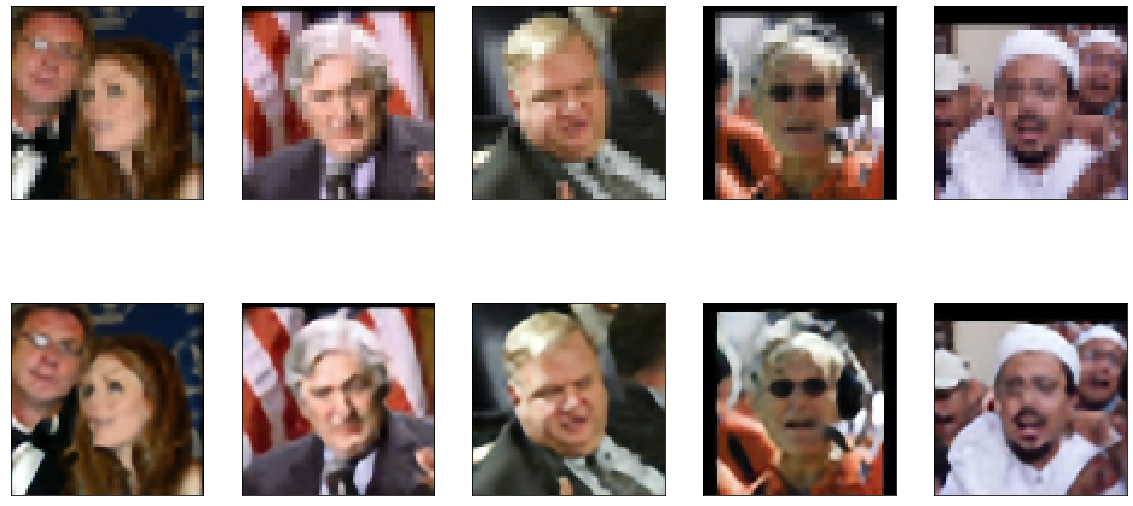

In [16]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(val_x_px[i+20])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, 5, i+1+5)
    plt.imshow(predictions[i+20])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Visualizing the performance of the model

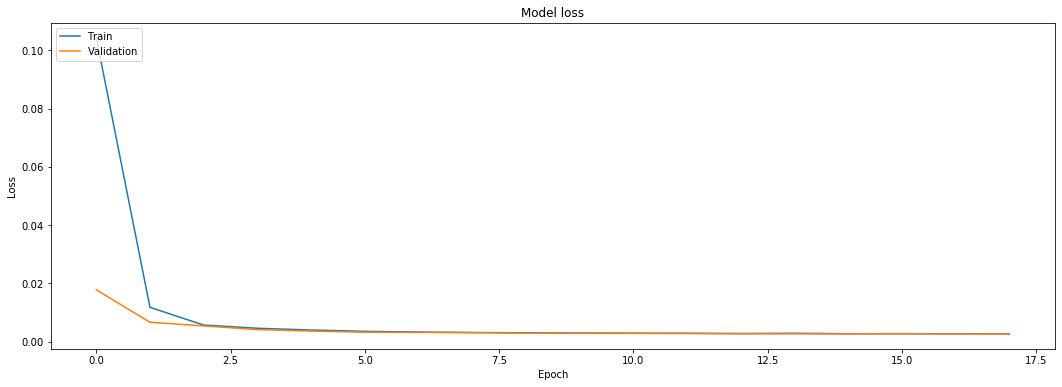

In [23]:
fig, axes = plt.subplots(1,1, figsize=(18, 6))

# Plot training & validation loss values
plt.plot(a_e.history['loss'])
plt.plot(a_e.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()